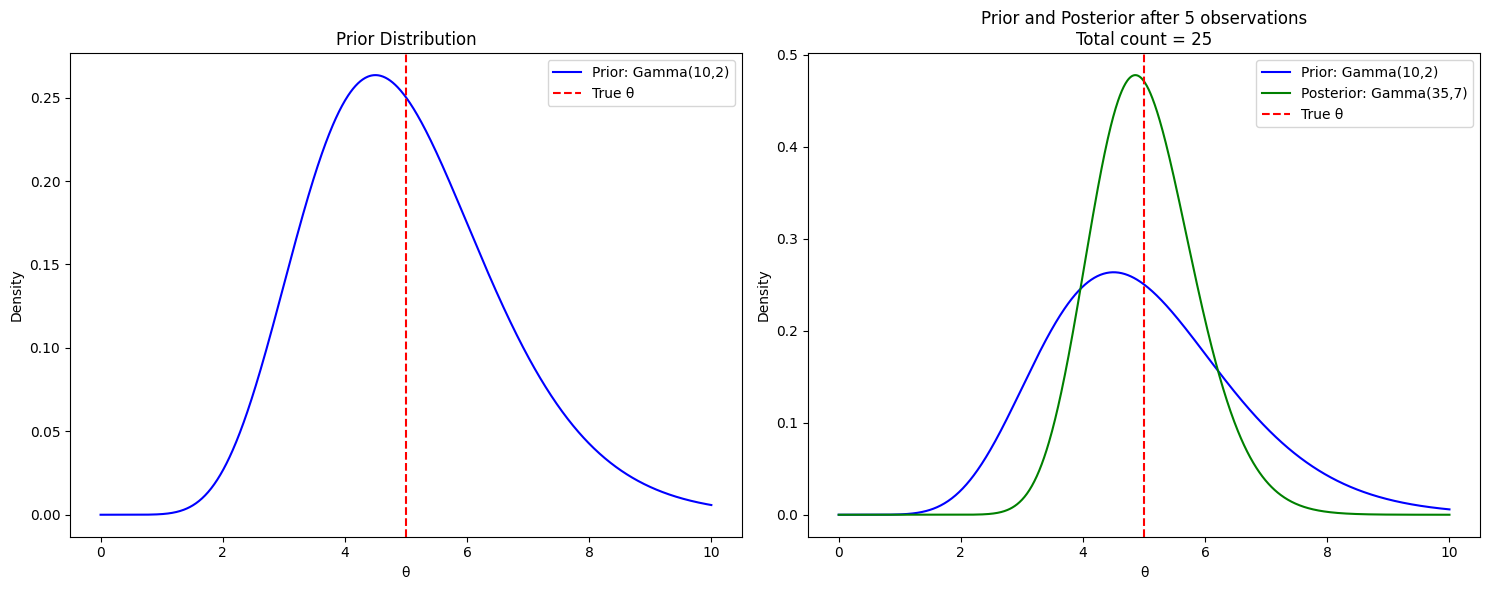

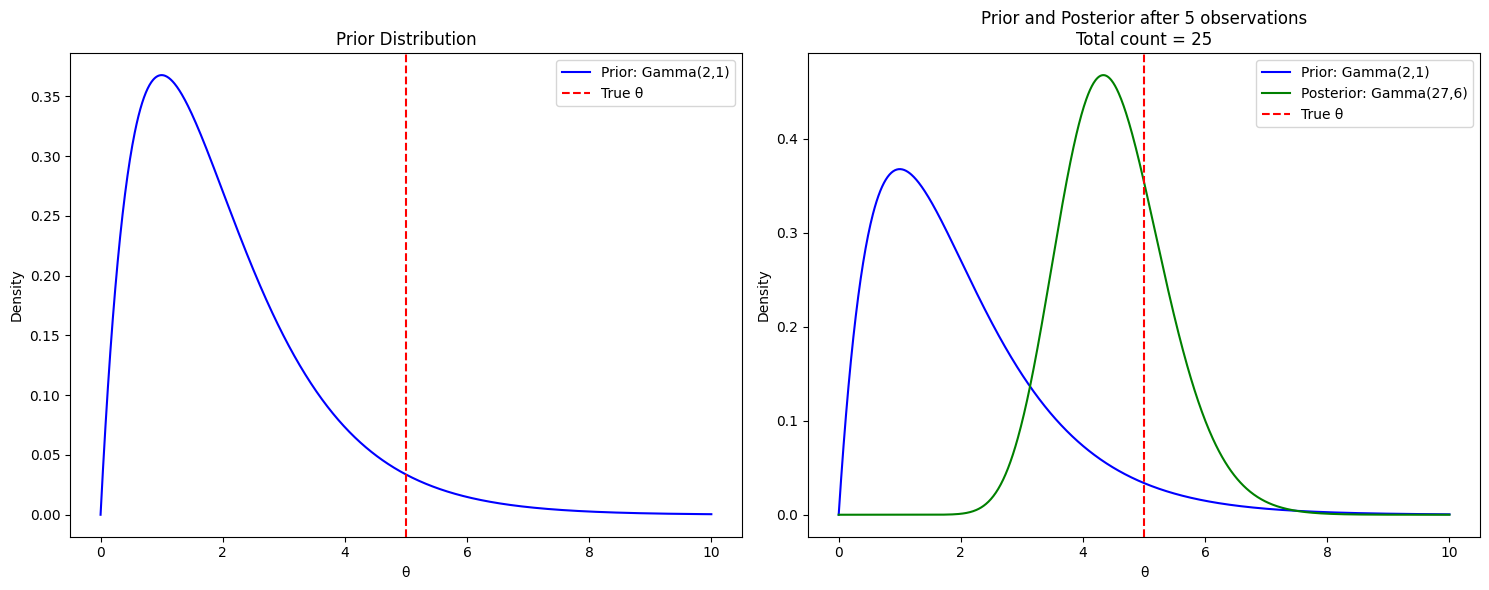

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import seaborn as sns

def plot_poisson_gamma_update(prior_alpha, prior_beta, data_sum, n_obs, true_theta=5):
    """
    Visualize how the Gamma distribution updates with Poisson data
    
    Parameters:
    -----------
    prior_alpha : float
        Shape parameter of prior Gamma distribution
    prior_beta : float
        Rate parameter of prior Gamma distribution
    data_sum : float
        Sum of observed counts
    n_obs : int
        Number of observations
    true_theta : float
        True rate parameter (for reference)
    """
    
    # Create theta values for plotting
    theta = np.linspace(0, true_theta * 2, 1000)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot prior
    prior = gamma.pdf(theta, prior_alpha, scale=1/prior_beta)
    ax1.plot(theta, prior, 'b-', label=f'Prior: Gamma({prior_alpha},{prior_beta})')
    ax1.axvline(true_theta, color='r', linestyle='--', label='True θ')
    ax1.set_title('Prior Distribution')
    ax1.set_xlabel('θ')
    ax1.set_ylabel('Density')
    ax1.legend()
    
    # Calculate posterior parameters
    post_alpha = prior_alpha + data_sum
    post_beta = prior_beta + n_obs
    
    # Plot both prior and posterior
    posterior = gamma.pdf(theta, post_alpha, scale=1/post_beta)
    ax2.plot(theta, prior, 'b-', label=f'Prior: Gamma({prior_alpha},{prior_beta})')
    ax2.plot(theta, posterior, 'g-', label=f'Posterior: Gamma({post_alpha},{post_beta})')
    ax2.axvline(true_theta, color='r', linestyle='--', label='True θ')
    ax2.set_title(f'Prior and Posterior after {n_obs} observations\nTotal count = {data_sum}')
    ax2.set_xlabel('θ')
    ax2.set_ylabel('Density')
    ax2.legend()
    
    plt.tight_layout()
    return fig

# Example with informative prior
fig1 = plot_poisson_gamma_update(prior_alpha=10, prior_beta=2, 
                                data_sum=25, n_obs=5, true_theta=5)

# Example with weak prior
fig2 = plot_poisson_gamma_update(prior_alpha=2, prior_beta=1, 
                                data_sum=25, n_obs=5, true_theta=5)

plt.show()

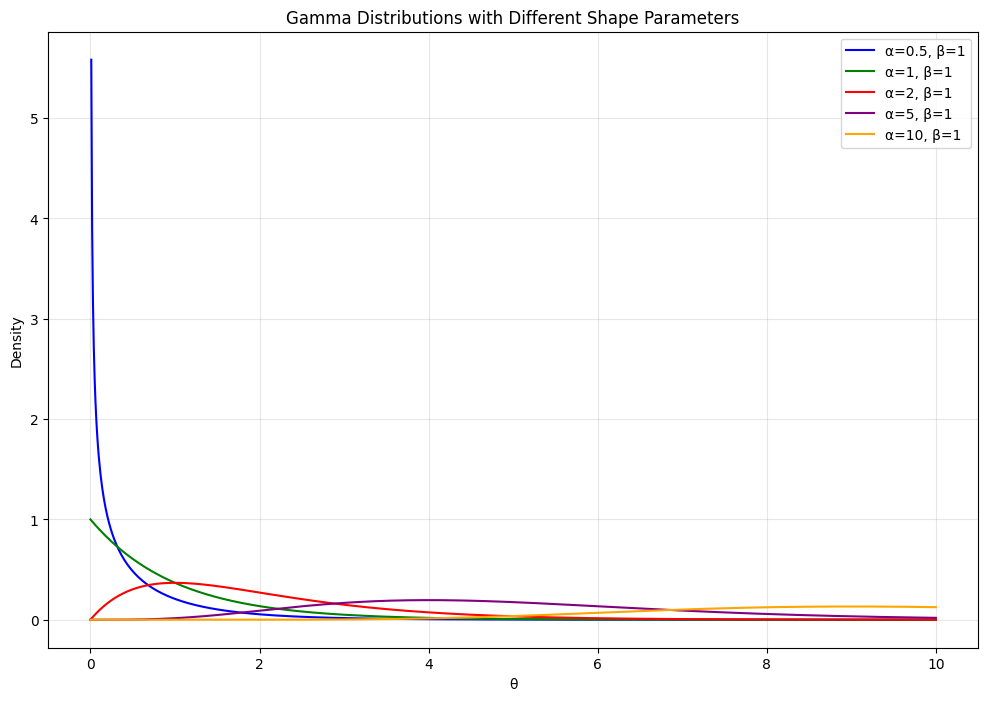

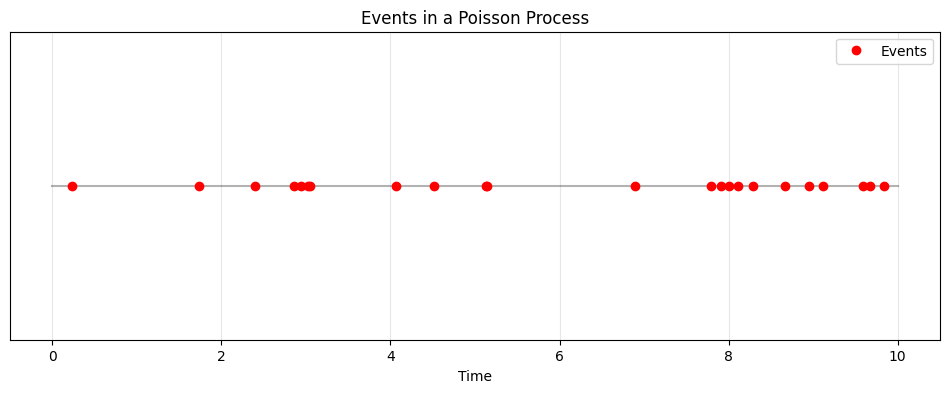

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Set up the plot
plt.figure(figsize=(12, 8))

# Create x values
x = np.linspace(0, 10, 1000)

# Plot different shape parameters
alphas = [0.5, 1, 2, 5, 10]
colors = ['blue', 'green', 'red', 'purple', 'orange']

for alpha, color in zip(alphas, colors):
    # Keep beta (rate) fixed at 1
    y = gamma.pdf(x, alpha, scale=1)
    plt.plot(x, y, color=color, label=f'α={alpha}, β=1')

plt.title('Gamma Distributions with Different Shape Parameters')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Now show waiting time interpretation
plt.figure(figsize=(12, 4))

# Simulate a Poisson process
np.random.seed(42)
rate = 2  # events per unit time
time = np.linspace(0, 10, 1000)
events = []
current_time = 0

while current_time < 10:
    # Generate next event time
    wait_time = np.random.exponential(1/rate)
    current_time += wait_time
    if current_time < 10:
        events.append(current_time)

plt.plot(time, [0]*len(time), 'k-', alpha=0.3)
plt.plot(events, [0]*len(events), 'ro', label='Events')
plt.title('Events in a Poisson Process')
plt.xlabel('Time')
plt.yticks([])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()